In [1]:
# Initialize Otter Grader
import otter
grader = otter.Notebook()

![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

___

#### NAME: Zhiyang Han

#### STUDENT ID: 3036337667
___

#  HW2: Core Concepts
Total 70 points

## 1. Ridge Regression

Run the following cell to load the required modules.

In [2]:
## Load the required modules
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1.a Introduction to Regularization (6 points)

In linear regression, our goal is to fit a linear model to the data and we find that linear model by solving the following optimization problem:

$$ \text{argmin}_{w \in \mathbb{R^d}} ||Xw-y||_2^2,$$

where $X$ is a $n \times d$ matrix containing $n$ data points each of which has $d$ features, and $y$ is a one-dimensional vector of size $n$ containing the corresponding responses. 

The optimum solution $w^*$ staisfies the following equation (why?): 
$$ (X^TX)w^* = X^Ty.$$

If $X$ is full rank, then we can solve for a unique solution $w^* = (X^TX)^{-1}X^Ty$. This formula was the one you used in the previous homework. Note that this derivation fails when $X^TX$ is not invertible. Even in that case, the features of the data could be close to collinear causing the input matrix $X$ to have singular values very close to 0, which in turn leads to numerical instability in computing the inverse of $X^TX$. 

A very simple solution to these issues is to consider $w_{ridge}^* = (X^TX+\lambda I)^{-1}X^Ty$ as the solution for some $\lambda > 0$. Note that $X^TX+\lambda I$ is always invertible and it's eigenvalues are at least $\lambda$ (why?). One can show that this is the solution to the following problem which is indeed the **ridge regression**: 

$$ \text{argmin}_{w \in \mathbb{R^d}} ||Xw-y||_2^2 + \lambda||w||_2^2.$$ 

The difference between this problem and linear regression is that we are penalizing the entries of $w$ from becoming too large. This is also a form of regularization that could be used to prevent overfitting to the data. Make sure you understand the concept of overfitting and regularization by going through these [slides](https://datax.berkeley.edu/wp-content/uploads/2020/09/slides-m220-theory-tools-regularization.pdf). 

As you can see, in ridge regression, all parameters are regularized equally, which is a special case of [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization). Note that $\lambda$ is a **hyperparamter** that measures the sensitivity to the values in $w$. You will see how to choose $\lambda$ in the next part where we talk about validation sets and cross-validation. 

Now, we use ridge regression to train a model on the dataset you used in the previous homework. Run the following cell to load the cleaned dataset with dummy variables and split it into training and test sets. 




In [3]:
## Run this cell, no need to modify
df_games = pd.read_csv("HW1_dataset_cleaned_with_dummies.csv") 

x = df_games[['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 
                       'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 
                       'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 
                       'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 
                       'Wii', 'WiiU', 'X360', 'XB', 'XOne', 'E', 'E10+', 'K-A', 'M', 'RP','T']].values
y = df_games['Global_Sales'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=2021)

**1.a.1)** Use scikit-learn function [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) to build your ridge regression model on the training data. Store your model in `ridge_model`. 

> **Setting:** `alpha=100` and `fit_intercept=True`.

Note that bias term is not regularized in ridge rigression. Read more about it [here](https://stackoverflow.com/questions/12578336/why-is-the-bias-term-not-regularized-in-ridge-regression). 

<!--
BEGIN QUESTION
name: q1a1
manual: false
points: 2
-->

In [4]:
## your code here

ridge_model = Ridge(alpha = 100, fit_intercept = True)
ridge_model.fit(x_train, y_train)

Ridge(alpha=100)

In [5]:
grader.check("q1a1")

q1a1 passed!

**1.a.2)** Calculate the **mean-squared-error** for the training data using scikit-learn function [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error) and store it in `ridge_train_error`. 

<!--
BEGIN QUESTION
name: q1a2
manual: false
points: 2
-->

In [6]:
## Your code here

train_pred = ridge_model.predict(x_train)
ridge_train_error = mean_squared_error(y_train, train_pred)
print(ridge_train_error)

3.323527419671444


In [7]:
grader.check("q1a2")

q1a2 passed!

The training error you obtained in question 4.3 of HW1 was 3.311. Compare this error with the one you obtained above. Did you expect the ridge regression error to be higher or lower? Why? (You don't need to write any answers.)

**1.a.3)** Now, compute the **mean-squared-error** for the test set and store it in `ridge_test_error`.

<!--
BEGIN QUESTION
name: q1a3
manual: false
points: 2
-->

In [8]:
## Your code here

test_pred = ridge_model.predict(x_test)
ridge_test_error = mean_squared_error(y_test, test_pred)
print(ridge_test_error)

1.4151338467955994


In [9]:
grader.check("q1a3")

q1a3 passed!

The test error you obtained in question 4.4 of HW1 was 1.419. Compare this error with the one you obtained above. As we mentioned before, regularization is a solution to generalization issues by preventing the model to overfit the data. Is your observation aligned with this statement? Has regularization helped you to do better on the test set? (You don't need to write any answers.)

## 2. Hyperparameter Tuning

### 2.a Validation Set (6 points)

A hyperparameter is a parameter whose value is used to control the learning process. Whereas the model parameters specify how to transform the input data into the desired output, the hyperparameters define how our model is actually structured. In ridge regression for example, $\lambda$ is a hyper-parameter that needs to be set before training the model. 

We can choose our model's hyperparamters by evaluating the model's ability to generalize to unseen data. You must not touch the test dataset more than once. If you use the test set for this evaluation, you will end up fitting the model architecture to the test set, losing the ability to truely evaluate how the model performs on unseen data. This is sometimes referred to as [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/).

A solution to this issue is to split the total dataset into three subsets: training set, validation set, and test set. For a particular choice of hyperparameters, we train our model on the training set, and then evaluate it on the validation set. Then, we compare different choices of hyperparameters based on how their corresponding model performs on the validation set and finally pick up the one that gives us the best performance on the validation set. 

Let's use this approach to set $\lambda$ in ridge regression. The training and test sets we used above are given to you.

In [10]:
## Run this cell, no need to modify
x = df_games[['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 
                       'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 
                       'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 
                       'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 
                       'Wii', 'WiiU', 'X360', 'XB', 'XOne', 'E', 'E10+', 'K-A', 'M', 'RP','T']].values
y = df_games['Global_Sales'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=2021)

**2.a.1)** Use scikit-learn function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) again to split the training set into a smaller training set and a validation set. Store the result in `x_train_prime`, `x_val`, `y_train_prime`, and `y_val`.

>**Setting:** Use 10% of the training dataset for the validation set and let `random_state=1399`.  

<!--
BEGIN QUESTION
name: q2a1
manual: false
points: 1
-->

In [11]:
## your code here
x_train_prime, x_val, y_train_prime, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1399)

In [12]:
grader.check("q2a1")

q2a1 passed!

**2.a.2)** Sweep hyperparameters in the array `alphas` given to you below and pick the one with which the ridge regression model trained on the training set performs the best on the validation set. Store the result in `alpha_best`. Use **mean-squared-error** to measure the performance of your model on the validation set. 


  

<!--
BEGIN QUESTION
name: q2a2
manual: false
points: 3
-->

In [13]:
## your code here
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
  
alphas_model = Ridge(alpha = 1.93069773e+02, fit_intercept = True)
alphas_model.fit(x_train_prime, y_train_prime)
alphas_pred = alphas_model.predict(x_val)
alphas_MSE = mean_squared_error(y_val, alphas_pred)
print(alphas_MSE)

alpha_best = 1.93069773e+02
print(alpha_best)

0.9902160104767329
193.069773


In [14]:
grader.check("q2a2")

q2a2 passed!

**2.a.3)** Train a ridge regression model with hyperparameter `alpha_best` on the larger training dataset, i.e. `x_train` and `y_train`. Then, compute the **mean-squared-error** for the test set and store it in `tuned_ridge_test_error`.

<!--
BEGIN QUESTION
name: q2a3
manual: false
points: 2
-->

In [15]:
## Your code here
tuned_model = Ridge(alpha = alpha_best, fit_intercept = True)
tuned_model.fit(x_train, y_train)
tuned_pred = tuned_model.predict(x_test)
tuned_ridge_test_error = mean_squared_error(y_test, tuned_pred)
print(tuned_ridge_test_error)

1.4211288350790219


In [16]:
grader.check("q2a3")

q2a3 passed!

Compare the error you obtained above with the one you got in question 1.3. Think about whether choosing the "best" hyper-parameter using a validation set helps the model to generalize better. (You don't need to write any answers.)

### 2.b Cross-Validation (5 points)

Run the following cell to load the required module. 

In [17]:
## Load the required module
from sklearn.model_selection import cross_val_score, KFold

Setting aside a validation set works well, but comes at a cost, since we cannot use the validation
data for training. Since having more data generally improves the quality of the trained model,
we may prefer not to let that data go to waste, especially if we have little data to begin with
and/or collecting more data is expensive. **Cross-validation** is an alternative to having a dedicated validation set.

$k$-fold cross-validation works as follows:

1.   Shuffle the data and partition it into $k$ equally-sized (or as equal as possible) blocks.
2.   For $i= 1, ..., k$,
 * Train the model on all the data except block $i$.
 * Evaluate the model (i.e. compute the validation error) using block i.
3.   Average the $k$ validation errors; this is our final estimate of the true error.

As before, the training and test data are given to you below. 





In [18]:
## Run this cell, no need to modify
x = df_games[['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 
                       'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 
                       'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy', 
                       'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 
                       'Wii', 'WiiU', 'X360', 'XB', 'XOne', 'E', 'E10+', 'K-A', 'M', 'RP','T']].values
y = df_games['Global_Sales'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 2021)

**2.b.1)** Sweep through the array `alphas` given to you below and pick the best hyperparameter by applying **4-fold** cross validation on the training set and store the hyperparameter you choose in `alpha_best_cv`. Use scikit-learn function [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). 

>**Setting:** Whenever you call `cross_val_score`, set `cv=kf` where `kf` is given to you bellow. 

<!--
BEGIN QUESTION
name: q2b1
manual: false
points: 3
-->

In [19]:
## your code here
alphas = 10 ** np.linspace(-3, 4, num=50, endpoint=True)
kf = KFold(4, shuffle=True, random_state=0)
cv_model = Ridge(alpha = 2.68269580e+01, fit_intercept = True)
cvscore = cross_val_score(cv_model, x_train, y_train, cv = kf)
print(cvscore.mean())

alpha_best_cv = 2.68269580e+01
print(alpha_best_cv)

0.19217213134657163
26.826958


In [20]:
grader.check("q2b1")

q2b1 passed!

**2.b.2)** Train a ridge regression model with hyperparameter `alpha_best_cv` on the training dataset, i.e. `x_train` and `y_train`. Then, compute the **mean-squared-error** for the test set and store it in `cv_ridge_test_error`.

<!--
BEGIN QUESTION
name: q2b2
manual: false
points: 2
-->

In [21]:
## Your code here
cvmodel = Ridge(alpha = 2.68269580e+01, fit_intercept = True)
cvmodel.fit(x_train, y_train)
cv_pred = cvmodel.predict(x_test)
cv_ridge_test_error = mean_squared_error(y_test, cv_pred)
print(cv_ridge_test_error)

1.4147758532121832


In [22]:
grader.check("q2b2")

q2b2 passed!

Compare this error with the ones you got in questions 1.3 and 2.a.3. Recall that the test error of your linear regression (in HW1) was 1.419. (You don't need to write any answers.)

# Classification with Breast Cancer Dataset

Run the following cell to load the required modules.

In [23]:
## Load the required modules
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, validation_curve, cross_val_score, GridSearchCV
from matplotlib import pyplot as plt
from timeit import default_timer as timer

We will now work on a medical dataset from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. Our objective is to diagnose whether a tumor is benign or malicious, represented as `'B'` and `'M'` respectively in the `'diagnosis'` field of the dataset. Available features are compueted from images of fine needle aspirate (FNA) of tumors. 

In [24]:
df_med = pd.read_csv("HW2_medical_data.csv")
df_med.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We hold out 20% of the data for assessment of model generalizability (i.e. for model testing). The rest 80% can be used for the training stage including hyperparameter tunings. We will use 5-fold cross-validation with partitions among the samples specified by the [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) instance `kf`.

In [25]:
## Run this cell without modifications
df_train, df_test = train_test_split(df_med,test_size=0.2,random_state=0)
kf = StratifiedKFold(5,shuffle=True,random_state=0)

We select the `'diagnosis'` field as the outcome variable and simply drop the outcome and the patient id from the original dataset to form the feature set.

In [26]:
## Run this cell without modifications
X_train = df_train.drop(['id','diagnosis'],axis=1)
y_train = df_train.diagnosis
X_test = df_test.drop(['id','diagnosis'],axis=1)
y_test = df_test.diagnosis

`plot_cv_curve` is a helper function that will be handy for plotting the cross-validation curves later. For now simply execute this cell.

In [27]:
## Run this cell without modifications
def plot_cv_curve(hyperparm_grid,train_scores,val_scores):
  ax = plt.subplot(111)
  ax.errorbar(hyperparm_grid,np.mean(train_scores,axis=1),yerr=np.std(train_scores,axis=1),label="train")
  ax.errorbar(hyperparm_grid,np.mean(val_scores,axis=1),yerr=np.std(val_scores,axis=1),label="validation")
  ax.set_xlabel('Hyperparameter')
  ax.set_ylabel('Score')
  ax.legend()
  ax.grid()
  return ax

## 3. Logistic Regression

We can build classifier with great interprebility through [logistic regression](https://datax.berkeley.edu/wp-content/uploads/2020/09/slides-m140-logistic-reg-sklearn.pdf?fbclid=IwAR2Ah4T7wfG2Jm-Ml8mB_mDM1zc6In5DLK1FtQqM8fp3AoaQMfWofTiDVnw). To get started, we train a logit model with default hyperparameters and perform 5-fold cross-validatoin with the help of `kf`. Each fold gives one score, and we average them to get the overall validation score.

In [28]:
## Demo: training a default logit model and cross-validate
logit = LogisticRegression(max_iter=5000)
cv_scores = cross_val_score(logit,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", cv_scores)
print ("Overall CV score is:", np.mean(cv_scores))

Cross-Validation Accuracies: [0.96703297 0.95604396 0.94505495 0.94505495 0.94505495]
Overall CV score is: 0.9516483516483516


The validation accuracy is already quite good! Can we further improve it by using different hyperparamers? 
***
### 3.a Cross-Validation Curve: Regularization (3 points)

**3.a)** The major hyperparameter for the linear logit model is the regularization parameter `'C'`. See the [sklearn API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) for usage. Ten potential choices for `'C'` are given in the `C_grid` array below. Train logit models for each C in `C_grid`, and record the training and validation scores from the 5-fold cross-validation with the [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) `kf`.

There is one training score and one validation score for each fold of the cross-validation and each hyperparameter choice.
- The training score is the model's accuracy on their train dataset in the cross-validation fold. 
- The validation score is the model's accuracy on their validation dataset in the cross-validation fold.

Therefore, you will get 10 (hyperparameter choices) $\times$ 5 (folds)=50 total training scores and 50 validation scores. 

**Store your answers in the following format:**
1. The obtained training scores are stored in an array with shape (10,5) called `train_scores`.
2. The validation scores are stored an array with shaped (10,5) called `val_scores`.

**Important points to follow (in order to pass the tests):**
- The first axis should align with the elements in `C_grid`, and the second axis corresponds to the 5 folds in the cross-validation as specified by `kf`.
- If you have the format correct, the `plot_cv_curve` function should be able to produce reasonble error plots with bars indicating the standard deviation of score for a given hyperparameters choice.
- **Make sure all the training converges**, which may be not the case under the default solver setting. The solver can be configured upon the initialization of the machine learning models. 
> To ensure accurate results under default tol (=1e-4) setting, <span style='background:yellow'>**use the `'newton-cg'` solver.</span>**

<!--
BEGIN QUESTION
name: q3a
manual: false
points: 3
-->

Wall time for training & cross-validation: 24.274651093874127 second


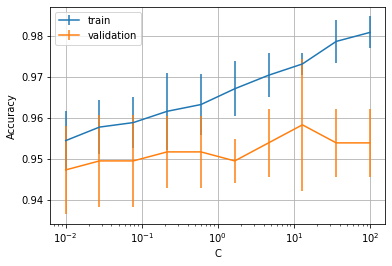

In [29]:
C_grid = np.logspace(-2,2,10)

time_start = timer()
## Your code here

train_list = []
val_list = []

for i in C_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        lr1 = LogisticRegression(C=i, max_iter=5000, solver='newton-cg').fit(xxtrain, yytrain)
        trainscores = lr1.score(xxtrain,yytrain)
        train_list.append(trainscores)
        valscores = lr1.score(xxtest,yytest)
        val_list.append(valscores)
    
train_scores = [train_list[x:x+5] for x in range(0, len(train_list), 5)]
val_scores = [val_list[x:x+5] for x in range(0, len(val_list), 5)]

time_end = timer()

print ("Wall time for training & cross-validation: {0} second".format(time_end-time_start))

ax = plot_cv_curve(C_grid,train_scores,val_scores)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')

In [30]:
grader.check("q3a")

q3a passed!

Think about it (no need to write answers): does the curves above, especailly the training accuray vs. regularization parameter C, follow your expectation? Reminder: smaller C implies stronger regularization strength.
***
### 3.b Feature Scaling (3 points)
You might have faced some numerical issues at first when training models for the last question. This is a common problem for gradient-based optimizations due to scale difference accross the features. The problem can be solved by [standardizing](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) the features, so all features have similar scales. The regularization also works better for standardized features (think about the reason.)

**3.b)** Now, **standardize the features before training the logistic model**, and repeat the hyperparameter tuning procedure in the last question to generate the cross-validation curve.

**Submission format:**
1. Store the training scores in an array with shape (10,5) called `train_scores`.
2. Store the validation scores in an array with shaped (10,5) called `val_scores`.

**Important points to follow:**
- Instead of having a universal standardization for the whole `X_train`, <span style='background:yellow'>**apply `StandardScaler` to fit and transform the train data for each cross-validation fold (which is 80% of `X_train`.)**</span> There will be slight differences in the fitted mean and variance between the two approaches, resulting in different inputs to the model. 
> The latter is also what will happen during cross-validation if you use a Pipeline (see 3.c) to concatenate the transformers with the classifier. This ensures that the transformer (e.g. the StandardScaler) and the classifier see consistent training data.
- Remaining Detailed instructions are the same as 3.a.

<!--
BEGIN QUESTION
name: q3b
manual: false
points: 3
-->

Wall time for training & cross-validation: 3.615089127793908 second


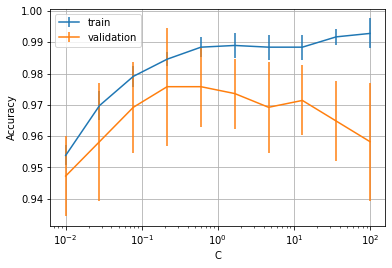

In [31]:
# Logit with Standardization
C_grid = np.logspace(-2,2,10)

time_start = timer()
## Your code here

scaler = StandardScaler()
train_list2 = []
val_list2 = []

for i in C_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler.fit(xxtrain)
        xxtrain = scaler.transform(xxtrain)
        xxtest = scaler.transform(xxtest)
        lr2 = LogisticRegression(C=i, max_iter=5000, solver='newton-cg').fit(xxtrain, yytrain)
        trainscores2 = lr2.score(xxtrain,yytrain)
        train_list2.append(trainscores2)
        valscores2 = lr2.score(xxtest,yytest)
        val_list2.append(valscores2)
    
train_scores = [train_list2[x:x+5] for x in range(0, len(train_list2), 5)]
val_scores = [val_list2[x:x+5] for x in range(0, len(val_list2), 5)]

time_end = timer()

print ("Wall time for training & cross-validation: {0} second".format(time_end-time_start))

ax = plot_cv_curve(C_grid,train_scores,val_scores)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')

In [32]:
grader.check("q3b")

q3b passed!

Do you notice the difference in the performance and running time?
***
### 3.c Build a Pipeline Classifier (2 points)

It is convenient to integrate the preprocessing steps with the classifier to form one [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline), so you just need to pass the raw data through the Pipeline for training/prediction. 

**3.c)** Build a Pipeline classifier containing the following **two steps**:
1. The first stage is a **StandardScaler()** that scales the input for the next stage.
2. The second stage is a **LogisticRegression()** Classifier with C=0.3.

Assign the Pipeline instance to a variable named `clf_logit`, and then train the Pipeline with all the training data (`X_train`,`y_train`.)

<!--
BEGIN QUESTION
name: q3c
manual: false
points: 2
-->

In [33]:
## Your code here

clf_logit = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(C=0.3,max_iter=5000, solver='newton-cg'))])
clf_logit.fit(X_train, y_train)

print ("Train Accuracy is", metrics.accuracy_score(y_train,clf_logit.predict(X_train)))
print ("Test Accuracy is", metrics.accuracy_score(y_test,clf_logit.predict(X_test)))

Train Accuracy is 0.9868131868131869
Test Accuracy is 0.9649122807017544


In [34]:
grader.check("q3c")

q3c passed!

## 4. K-Nearest Neighbors Vote Classification

Our next candidate model is the [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#) (k-NN) classifier. We start by training a [k-NN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with default hyperparameters:

In [35]:
## Demo: training a default KNN model and cross-validate
knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", cv_scores)
print ("Overall CV score is:", np.mean(cv_scores))

Cross-Validation Accuracies: [0.95604396 0.94505495 0.94505495 0.94505495 0.9010989 ]
Overall CV score is: 0.9384615384615385


***
### 4.a Cross-Validation: Number of Neighbors (3 points)

The main hyperparameter for k-NN is `'n_neighbors'`, the number of nearest neighbors that is considered during classification. 

**4.a)** Twenty potential choices for `'n_neighbors'` are given in the `N_grid` array below. Train k-NN models for each n_neighbors in `N_grid`, and record the training and validation scores from the 5-fold cross-validation with folds defined by `kf`.

**Submission format:**
1. Store the training scores in an array with shape (20,5) called `train_scores`.
2. Store the validation scores in an array with shaped (20,5) called `val_scores`.

<!--
BEGIN QUESTION
name: q4a
manual: false
points: 3
-->

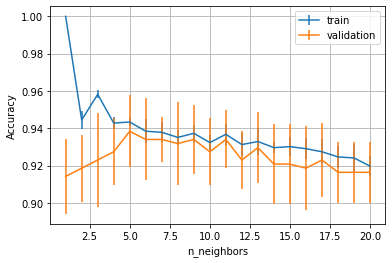

In [36]:
N_grid = range(1,21)

train_list = []
val_list = []

for i in N_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        knn2 = KNeighborsClassifier(n_neighbors=i).fit(xxtrain, yytrain)
        trainscores3 = knn2.score(xxtrain,yytrain)
        train_list.append(trainscores3)
        valscores3 = knn2.score(xxtest,yytest)
        val_list.append(valscores3)
    
train_scores = [train_list[x:x+5] for x in range(0, len(train_list), 5)]
val_scores = [val_list[x:x+5] for x in range(0, len(val_list), 5)]

ax = plot_cv_curve(N_grid,train_scores,val_scores)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('Accuracy')
plt.show()

In [37]:
grader.check("q4a")

q4a passed!

Think about it: how does the bias and variance of the model vary with `n_neighbor`?

***
### 4.b Challenge: Feature Engineering and Hyperparameter Tuning (6 points)

**4.b)** Now you are ready to optimize the k-NN classifier on your own. Tune any k-NN hyperparameters to improve the cross-validation score. You may also engineer the features before applying k-NN classifications, but remember to concatenate all these steps into a single Pipeline.

**Submission Format (read carefully):**
1. Store the final classifier in a vairable named `clf_knn`.
2. If `clf_knn` is a pipeline, the final stage must be a KNeighborsClassifier with the stage name being 'knn'. This is to ensure the grader can parse your submission.
3. Whether or not there are preprocessing stages in `clf_knn`, `clf_knn` must take the same input format as `X_train` and `X_test` for classifying the tumor.

You will receive full credit for this problem if you achieve **>96% overall cross-validation (folds defined by `kf`) accuracy using `clf_knn`**. You will receive **50% credit for cross-validation accuracy of 95~96%**. 

The test "q4b1" checks if you achive >95% CV accuracy.
<!--
BEGIN QUESTION
name: q4b1
manual: false
points: 3
-->

In [38]:
## Example: declare a pipeline with only one stage KNeighborsClassifier() named 'knn'
## You can overwrite clf_knn with your own classifier
## Your code here
from sklearn.model_selection import GridSearchCV

scaler1 = StandardScaler()

for i in N_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)

clf_knn = Pipeline([('scaler1', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6,p=1,weights='distance'))])
clf_knn.fit(X_train, y_train)

knn = KNeighborsClassifier()
param = {'weights': ['distance'],'n_neighbors': [i for i in range(6, 7)],'p': [i for i in range(1, 2)]}
grid_search = GridSearchCV(knn, param, n_jobs=-1, verbose=2).fit(X_train, y_train)
print(grid_search.best_params_)


print ("Final KNN Hyperparameters:")
print (clf_knn.named_steps['knn'] if clf_knn.__class__==Pipeline else clf_knn)
print ("Overall CV score is:", np.mean(cross_val_score(clf_knn,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_knn.predict(X_test)))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Final KNN Hyperparameters:
KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')
Overall CV score is: 0.9626373626373625
Test Accuracy is: 0.956140350877193


In [39]:
grader.check("q4b1")

q4b1 passed!

The test "q4b2" checks if you achive >96% CV accuracy.
<!--
BEGIN QUESTION
name: q4b2
manual: false
points: 3
-->

In [40]:
## Dummy Cell, DO NOT MODIFY

In [41]:
grader.check("q4b2")

q4b2 passed!

## 5. Support Vector Machine Classification

[Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html#svm) (SVM) is a powerful algorithm suitable for a wide range of machine learning problems. We will stick to the [classification tasks](https://scikit-learn.org/stable/modules/svm.html#classification) for the rest of the homework, but SVM can actually be applied to regressions as well. We will start with the basic linear SVM, and then explore the empowering technique for non-linear modeling - the kernel trick.

### 5.a Linear SVM (3 points)

The [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) tries to learn a hyperplane that best separates different classes. Linear SVM defines margins for classification $w^T x + b = \pm 1$ ($+1$ and $-1$ correspond to margins for different classes. See [mathematical detail](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation).)
- Typically a [hinge loss](https://en.wikipedia.org/wiki/Hinge_loss) is used to account for marginal and misclassified samples. The farther the misclassified sample is from the margin (i.e. the "deeper" the sample is misclassified into the wrong class), the larger the hinge loss. Minimizing this loss reduces misclassifications.
- At the same time, we want the margin between classes to be large, which can be characterized by another loss $||w||^2$.

SVM combines the two losses with a factor "C" before the hinge loss to control their relative effectiveness. The larger the C, the harder the SVM tries to classify samples correctly, but this can result in overfitting. Therefore, C is a regularization parameter that helps you control the softness of the decision, similar to what you have tuned for the logistic regression.

**5.a)** To observe the effect of C, we have provided 9 potential choices in the array `C_grid` below. Train LinearSVC models for each C in `C_grid`, and record the training and validation scores from the 5-fold cross-validation with folds defined by `kf`.

**Submission format:**
1. **Standardize** the features before applying to SVM training and cross-validation.
2. Use the **Standard hinge loss** for the classification. *(hint: this may not be the default setting of LinearSVC)*
3. Again, manage to make all trainings converge.
4. Store the training scores in an array with shape (9,5) called `train_scores`.
5. Store the validation scores in an array with shaped (9,5) called `val_scores`.

Remaining detailed instructions are the same as that for the first validation curve question.

<!--
BEGIN QUESTION
name: q5a
manual: false
points: 3
-->

/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


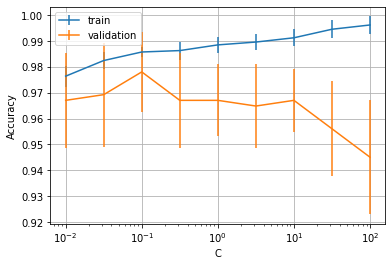

In [42]:
C_grid = np.logspace(-2,2,9)
## Your code here

train_list = []
val_list = []

scaler1 = StandardScaler()

for i in C_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)
        svm = LinearSVC(C=i, loss='hinge', max_iter = 20000).fit(xxtrain, yytrain)
        trainscores4 = svm.score(xxtrain,yytrain)
        train_list.append(trainscores4)
        valscores4 = svm.score(xxtest,yytest)
        val_list.append(valscores4)
    
train_scores = [train_list[x:x+5] for x in range(0, len(train_list), 5)]
val_scores = [val_list[x:x+5] for x in range(0, len(val_list), 5)]



ax = plot_cv_curve(C_grid,train_scores,val_scores)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')

In [43]:
grader.check("q5a")

q5a passed!

Do the curves have the behaviors you expected?
***
LinearSVC already works very well, which means the classes are almost linearly separable. However, we are still curious to see if we can achieve an even-better performance with non-linear decision boundaries. Practically, non-linear functions (e.g. polynomials) of features are utilized through the [kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions). It's ok not to understand all the math for this homework, but it is important to keep one thing in mind: more flexibility to the model means more engineering (e.g. hyperparameter tuning), or the model can be easily messed up and defeat by linear model!

### 5.b Challenge: Gaussian (aka Radial Basis Function) Kernel SVM (6 points)

**5.b)** Optimize an [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) with 'rbf' kernel classifier. Tune any SVC hyperparameters to improve the cross-validation score. You may also engineer the features before applying SVM classifications, but remember to concatenate all these steps into a single Pipeline.

**Submission Format (read carefully):**
1. Store the final classifier in a vairable named `clf_svm_rbf`.
2. If `clf_svm_rbf` is a pipeline, the final stage must be an SVC with the stage name being 'svc'. This is to ensure the grader can parse your submission.
3. Whether or not there are preprocessing stages in `clf_svm_rbf`, `clf_svm_rbf` must take the same input format as `X_train` and `X_test` for classifying the tumor.

You will receive full credit for this problem if you achieve **>97.5% overall cross-validation (folds defined by `kf`) accuracy using `clf_svm_rbf`**. You will receive **50% credit for cross-validation accuracy of 96%~97.5%**.

**Hint: Aside from `C`, rbf-kernel SVM is controlled by another hyperparameter `gamma`.**

The test "q5b1" checks if you achive >96% CV accuracy.
<!--
BEGIN QUESTION
name: q5b1
manual: false
points: 3
-->

In [44]:
## Example: declare a pipeline with only one stage SVC() named 'svc' with rbf kernel
## You can overwrite clf_svm_rbf with your own classifier
clf_svm_rbf = Pipeline([('scaler1', StandardScaler()), ('svc', SVC(kernel='rbf',C=1))])
clf_svm_rbf.fit(X_train, y_train)

## Your code here
scaler1 = StandardScaler()
train_list2 = []
val_list2 = []

for i in C_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)
        scv = SVC(C=i).fit(xxtrain, yytrain)

param_grid = {'C': C_grid, 'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1).fit(X_train, y_train)

print ("Final SVM Hyperparameters:")
print (clf_svm_rbf.named_steps['svc'] if clf_svm_rbf.__class__==Pipeline else clf_svm_rbf)
print ("Overall CV score is:", np.mean(cross_val_score(clf_svm_rbf,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_svm_rbf.predict(X_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Final SVM Hyperparameters:
SVC(C=1)
Overall CV score is: 0.9758241758241759
Test Accuracy is: 0.9824561403508771


In [45]:
grader.check("q5b1")

q5b1 passed!

The test "q5b2" checks if you achive >97.5% CV accuracy.

<!--
BEGIN QUESTION
name: q5b2
manual: false
points: 3
-->

In [46]:
## Dummy Cell, DO NOT MODIFY

In [47]:
grader.check("q5b2")

q5b2 passed!

### 5.c Challenge: Polynomial Kernel SVM (6 points)
**5.c)** Optimize an SVC with 'poly' kernel classifier. Tune any SVC hyperparameters to improve the cross-validation score. You may also engineer the features before applying SVM classifications, but remember to concatenate all these steps into a single Pipeline.

**Submission Format (read carefully):**
1. Store the final classifier in a vairable named `clf_svm_poly`.
2. If `clf_svm_poly` is a pipeline, the final stage must be an SVC with the stage name being 'svc'. This is to ensure the grader can parse your submission.
3. Whether or not there are preprocessing stages in `clf_svm_poly`, `clf_svm_poly` must take the same input format as `X_train` and `X_test` for classifying the tumor.

You will receive full credit for this problem if you achieve **>97.5% overall cross-validation (folds defined by `kf`) accuracy using `clf_svm_poly`**. You will receive **50% credit for cross-validation accuracy of 96%~97.5%**.

**Hint: Consult the [document](https://scikit-learn.org/stable/modules/svm.html#svm-kernels) for the relevant hyperparameters of poly kernel.**

The test "q5c1" checks if you achive >96% CV accuracy.

<!--
BEGIN QUESTION
name: q5c1
manual: false
points: 3
-->

In [208]:
## Example: declare a pipeline with only one stage SVC() named 'svc' with poly kernel
## You can overwrite clf_svm_poly with your own classifier
clf_svm_poly = Pipeline([('scaler1', StandardScaler()), ('svc', SVC(kernel='poly', C=1,degree=3,coef0=1,random_state=0))])
clf_svm_poly.fit(X_train, y_train)

## Your code here
scaler1 = StandardScaler()
train_list2 = []
val_list2 = []

for i in C_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)
        scv2 = SVC(C=i).fit(xxtrain, yytrain)

train_scores = [train_list2[x:x+5] for x in range(0, len(train_list2), 5)]
val_scores = [val_list2[x:x+5] for x in range(0, len(val_list2), 5)]

param_grid = {'C': C_grid, 'kernel': ['poly']}  
  
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 1).fit(X_train, y_train)
print(grid.best_params_) 

print ("Final SVM Hyperparameters:")
print (clf_svm_poly.named_steps['svc'] if clf_svm_poly.__class__==Pipeline else clf_svm_poly)
print ("Overall CV score is:", np.mean(cross_val_score(clf_svm_poly,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_svm_poly.predict(X_test)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'C': 31.622776601683793, 'kernel': 'poly'}
Final SVM Hyperparameters:
SVC(C=1, coef0=1, kernel='poly', random_state=0)
Overall CV score is: 0.9758241758241759
Test Accuracy is: 0.9912280701754386


In [202]:
grader.check("q5c1")

q5c1 passed!

The test "q5c2" checks if you achive >97.5% CV accuracy.

<!--
BEGIN QUESTION
name: q5c2
manual: false
points: 3
-->

In [50]:
## Dummy Cell, DO NOT MODIFY

In [209]:
grader.check("q5c2")

q5c2 passed!

## 6. Decision Tree


[Decision Tree](https://scikit-learn.org/stable/modules/tree.html) can be used for both linear and non-linear data, and can be used for both classification and regression problems. In lectures, you were given a basic introduction to decision trees and how such trees are trained. Here, we will dive deep and learn how the hyperparameters can impact the decision tree models.


We start by training a decision tree classifier with default hyperparameters:

In [52]:
## Demo: training a default decision tree model and cross-validate
dt_model = DecisionTreeClassifier(random_state=0)
dt_cv_scores = cross_val_score(dt_model,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", dt_cv_scores)
print ("Overall CV score is:", np.mean(dt_cv_scores))

Cross-Validation Accuracies: [0.86813187 0.92307692 0.89010989 0.91208791 0.92307692]
Overall CV score is: 0.9032967032967033


***
### 6.a Cross-Validation: Maximum Depth of Tree (3 points)
A basic decision tree algorithm keeps subdividing tree nodes until every leaf is pure. Sometimes, due to the noise existing in data, it may cause overfitting. To limit tree size and depth for speed and avoiding overfitting, we need pre-pruning, that is to say, stopping the tree-building process early.
One common stopping condition is setting the maximum depth, that means when a decision tree arrives at a certain depth, it will stop dividing.

**6.a)** Twenty potential choices for `'max_depth'` are given in the `max_dep` array below. Train decision tree models for each max_depth in `max_dep`, and record the training and validation scores from the 5-fold cross-validation with folds defined by `kf`.

**Submission format:**
1. Store the training scores in an array with shape (20,5) called `train_scores`.
2. Store the validation scores in an array with shaped (20,5) called `val_scores`.

**Important points to follow:**
- <span style='background:yellow'>Use `random_state=0` for training</span>. Other training criteria should be the same as the default according to [the API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
- Remaining instructions are the same as 3.a.

<!--
BEGIN QUESTION
name: q6a
manual: false
points: 3
-->

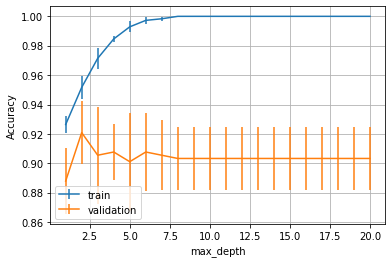

In [53]:
max_dep = range(1,21)

train_list = []
val_list = []

for i in max_dep:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)
        dt_model = DecisionTreeClassifier(max_depth=i, random_state=0).fit(xxtrain, yytrain)
        trainscores4 = dt_model.score(xxtrain,yytrain)
        train_list.append(trainscores4)
        valscores4 = dt_model.score(xxtest,yytest)
        val_list.append(valscores4)
    
train_scores = [train_list[x:x+5] for x in range(0, len(train_list), 5)]
val_scores = [val_list[x:x+5] for x in range(0, len(val_list), 5)]

ax = plot_cv_curve(max_dep,train_scores,val_scores)
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

In [54]:
grader.check("q6a")

q6a passed!

***
### 6.b Challenge: Feature Engineering and Hyperparameter Tuning (6 points)

Except for 'max_depth', there are also other [hyperparameters](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680) are critical, such as 'max_leaf_nodes', 'min_samples_split', 'min_samples_leaf', etc. 

For example, the minimum sample split is the minimum sample number in
an internal node. If the number of samples in a node is
smaller than the minimum sample split, it will stop
splitting. The minimum sample leaf means the minimum
number of samples required to be at a leaf node.

**6.b)** Now you are ready to optimize the decision tree classifier on your own. Tune any decision tree hyperparameters to improve the cross-validation score. You may also engineer the features before applying decision tree classifications, but remember to concatenate all these steps into a single Pipeline.

**Submission Format (read carefully):**
1. Store the final classifier in a vairable named `clf_dt`.
2. If `clf_dt` is a pipeline, the final stage must be a DecisionTreeClassifier with the stage name being 'dt'. This is to ensure the grader can parse your submission.
3. Whether or not there are preprocessing stages in `clf_dt`, `clf_dt` must take the same input format as `X_train` and `X_test` for classifying the tumor.

You will receive full credit for this problem if you achieve **>92.5% overall cross-validation (folds defined by `kf`) accuracy using `clf_dt`**. You will receive **50% credit for cross-validation accuracy of 92~92.5%**. 

The test "q6b1" checks if you achive >92.5% CV accuracy.
<!--
BEGIN QUESTION
name: q6b1
manual: false
points: 3
-->

In [135]:
## Example: declare a pipeline with only one stage DecisionTreeClassifier() named 'dt'
## You can overwrite clf_dt with your own classifier
clf_dt = Pipeline([('scaler1', StandardScaler()), ('dt',DecisionTreeClassifier(criterion='gini',max_depth=12, min_samples_leaf=6,random_state=0))])
clf_dt.fit(X_train, y_train)

## Your code here
scaler1 = StandardScaler()
train_list2 = []
val_list2 = []

for i in max_dep:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)
        dt = DecisionTreeClassifier(max_depth=i, random_state=0).fit(xxtrain, yytrain)
        
param = {'criterion':['gini'],'max_depth':range(1, 21),'min_samples_leaf':range(1, 11)}
dtgrid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param,cv=5)
dtgrid.fit(X_train,y_train)

print ("Final Decision Tree Hyperparameters:")
print (clf_dt.named_steps['dt'] if clf_dt.__class__==Pipeline else clf_dt)
print ("Overall CV score is:", np.mean(cross_val_score(clf_dt,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_dt.predict(X_test)))

Final Decision Tree Hyperparameters:
DecisionTreeClassifier(max_depth=12, min_samples_leaf=6, random_state=0)
Overall CV score is: 0.9274725274725274
Test Accuracy is: 0.9473684210526315


In [133]:
grader.check("q6b1")

q6b1 passed!

The test "q6b2" checks if you achive >92% CV accuracy.

<!--
BEGIN QUESTION
name: q6b2
manual: false
points: 3
-->

In [57]:
## Dummy Cell, DO NOT MODIFY

In [134]:
grader.check("q6b2")

q6b2 passed!

## 7. Ensemble Method 1: Random Forest

Now we get better ideas about decision trees. The basic idea of [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is to build many decision trees and have them vote. Therefore, random forest can help to improve the classification accuracy and prevent overfitting. But we only have one training set, how can we build many trees using only one dataset? 


Random forest will use several decision tree classifiers on various sub-samples of the dataset and use the average of them. The sub-sample size is controlled with the 'max_samples' parameter if bootstrap=True (default), and otherwise the whole dataset is used to build each tree.

In [59]:
## Demo: training a default random forest model and cross-validate
rf_model = RandomForestClassifier(random_state=0)
rf_cv_scores = cross_val_score(rf_model,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", rf_cv_scores)
print ("Overall CV score is:", np.mean(rf_cv_scores))

Cross-Validation Accuracies: [0.95604396 0.94505495 0.95604396 0.95604396 0.95604396]
Overall CV score is: 0.9538461538461538


***
### 7.a Challenge: Feature Engineering and Hyperparameter Tuning (6 points)

Similar to decision tree, you can also tune the hyperparameters of your random forest classifier. 

**7.a)** Please try to tune any random forest hyperparameters to improve the cross-validation score. You may also engineer the features before applying random forest classifications, but remember to concatenate all these steps into a single Pipeline.

**Submission Format (read carefully):**
1. Store the final classifier in a vairable named `clf_rf`.
2. If `clf_rf` is a pipeline, the final stage must be a RandomForestClassifier with the stage name being 'rf'. This is to ensure the grader can parse your submission.
3. Whether or not there are preprocessing stages in `clf_rf`, `clf_rf` must take the same input format as `X_train` and `X_test` for classifying the tumor.

You will receive full credit for this problem if you achieve **>95.5% overall cross-validation (folds defined by `kf`) accuracy using `clf_rf`**. You will receive **50% credit for cross-validation accuracy of 95~95.5%**. 

The test "q7a1" checks if you achive >95.5% CV accuracy.
<!--
BEGIN QUESTION
name: q7a1
manual: false
points: 3
-->

In [139]:
## Example: declare a pipeline with only one stage RandomForestClassifier() named 'rf'
## You can overwrite clf_rf with your own classifier
clf_rf = Pipeline([('scaler1', StandardScaler()), ('rf',RandomForestClassifier(max_depth=6,n_estimators=80,random_state=0))])
clf_rf.fit(X_train, y_train)

## Your code here

scaler1 = StandardScaler()
train_list2 = []
val_list2 = []

for i in max_dep:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)
        rf = RandomForestClassifier(max_depth=i, random_state=0).fit(xxtrain, yytrain)

param = {'max_depth':range(1, 10),'n_estimators':range(1,15)}
rfgrid = GridSearchCV(RandomForestClassifier(random_state=0),param_grid=param,cv=5)
rfgrid.fit(X_train,y_train)

print ("Final Random Forest Hyperparameters:")
print (clf_rf.named_steps['rf'] if clf_rf.__class__==Pipeline else clf_rf)
print ("Overall CV score is:", np.mean(cross_val_score(clf_rf,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_rf.predict(X_test)))

{'max_depth': 6, 'n_estimators': 11} 0.9516483516483516
Final Random Forest Hyperparameters:
RandomForestClassifier(max_depth=6, random_state=0)
Overall CV score is: 0.9538461538461538
Test Accuracy is: 0.9649122807017544


In [147]:
grader.check("q7a1")

q7a1 passed!

The test "q7a2" checks if you achive >95% CV accuracy.

<!--
BEGIN QUESTION
name: q7a2
manual: false
points: 3
-->

In [62]:
## Dummy Cell, DO NOT MODIFY

In [148]:
grader.check("q7a2")

q7a2 passed!

## 8. Ensemble Method 2: AdaBoost

[AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) (Adaptive Boosting) is a ensemble boosting classifier. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. 
The hyperparameters of AdaBoost classifier includes base_estimator, n_estimators, learning_rate, etc.

- base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier with max_depth=1 as default weak learner for training purpose. You can also specify different machine learning algorithms.
- n_estimators: Number of weak learners to train iteratively.
- learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [64]:
## Demo: training a default AdaBoost model and cross-validate
adaboost_model = AdaBoostClassifier(random_state=0)
rf_cv_scores = cross_val_score(adaboost_model,X_train,y_train,cv=kf)
print ("Cross-Validation Accuracies:", rf_cv_scores)
print ("Overall CV score is:", np.mean(rf_cv_scores))

Cross-Validation Accuracies: [0.96703297 0.96703297 0.96703297 0.94505495 0.95604396]
Overall CV score is: 0.9604395604395604


### 8.a Challenge: Feature Engineering and Hyperparameter Tuning (6 points)

**8.a)** You can use the same method to tune the hyperparameters of your AdaBoost classifier. 

**Submission Format (read carefully):**
1. Store the final classifier in a vairable named `clf_ab`.
2. If `clf_ab` is a pipeline, the final stage must be a AdaBoostClassifier with the stage name being 'ab'. This is to ensure the grader can parse your submission.
3. Whether or not there are preprocessing stages in `clf_ab`, `clf_ab` must take the same input format as `X_train` and `X_test` for classifying the tumor.

You will receive full credit for this problem if you achieve **>96.5% overall cross-validation (folds defined by `kf`) accuracy using `clf_ab`**. You will receive **50% credit for cross-validation accuracy of 96~96.5%**. 

The test "q8a1" checks if you achive >96.5% CV accuracy.

<!--
BEGIN QUESTION
name: q8a1
manual: false
points: 3
-->

In [155]:
## Example: declare a pipeline with only one stage AdaBoostClassifier() named 'ab'
## You can overwrite clf_ab with your own classifier
clf_ab = Pipeline([('scaler1', StandardScaler()), ('ab',AdaBoostClassifier(n_estimators=350))])
clf_ab.fit(X_train, y_train)

## Your code here
scaler1 = StandardScaler()
train_list2 = []
val_list2 = []

for i in N_grid:
    for train_index, test_index in kf.split(X_train, y_train):
        xxtrain, xxtest = X_train.iloc[train_index], X_train.iloc[test_index]
        yytrain, yytest = y_train.iloc[train_index], y_train.iloc[test_index]
        scaler1.fit(xxtrain)
        xxtrain = scaler1.transform(xxtrain)
        xxtest = scaler1.transform(xxtest)
        ab = AdaBoostClassifier(n_estimators=i, random_state=0).fit(xxtrain, yytrain)


print ("Final AdaBoost Hyperparameters:")
print (clf_ab.named_steps['ab'] if clf_ab.__class__==Pipeline else clf_ab)
print ("Overall CV score is:", np.mean(cross_val_score(clf_ab,X_train,y_train,cv=kf)))
print ("Test Accuracy is:", metrics.accuracy_score(y_test,clf_ab.predict(X_test)))

Final AdaBoost Hyperparameters:
AdaBoostClassifier(n_estimators=350)
Overall CV score is: 0.9670329670329669
Test Accuracy is: 0.956140350877193


In [156]:
grader.check("q8a1")

q8a1 passed!

The test "q8a2" checks if you achive >96% CV accuracy.

<!--
BEGIN QUESTION
name: q8a2
manual: false
points: 3
-->

In [67]:
## Dummy Cell, DO NOT MODIFY

In [157]:
grader.check("q8a2")

q8a2 passed!

# Wrap-up: Model Comparison
Now you have successfully trained several models and tuned the hyperparameters of them. Which model performs the best with the breast cancer dataset?

In [158]:
Model_dict = {
    'Logistic regression':clf_logit, 'k-NN': clf_knn,
    'SVM (RBF Kernel)': clf_svm_rbf, 'SVM (Poly Kernel)': clf_svm_poly,
    'Decision Tree': clf_dt, 'Ramdom Forest': clf_rf, 'AdaBoost': clf_ab
}
## Run the cell to view your accuracy of all the models
models = []
errors = []
for modelname, clf in Model_dict.items():
  models.append(modelname)
  errors.append((1-metrics.accuracy_score(y_test,clf.predict(X_test)))*100)
df_test_erorr = pd.DataFrame({"Model":models,"Test Error Rate (%)":errors})
df_test_erorr.sort_values(by="Test Error Rate (%)")

,Model,Test Error Rate (%)
2,SVM (RBF Kernel),1.754386
3,SVM (Poly Kernel),2.631579
0,Logistic regression,3.508772
1,k-NN,4.385965
5,Ramdom Forest,4.385965
6,AdaBoost,4.385965
4,Decision Tree,5.263158


Now pick the best model you found in the previous cell to view the importance of each feature in this dataset. Here, we will use a function called "[permutation_importance](https://scikit-learn.org/stable/modules/permutation_importance.html)". The permutation feature importance function helps to calculate the importance of estimators for the dataset. The n_repeats parameter sets the number of times a feature is randomly shuffled and returns a sample of feature importances. 

Now you can put the name of the best model you found from previous question in the variable called "best_model", and run the following 2 cells: one to plot the importance of training dataset and one for testing dataset. What do you find from the two plots? Do they agree with each other?

**This section will not be graded.**

Text(0.5, 1.0, 'Permutation Importances (train set)')

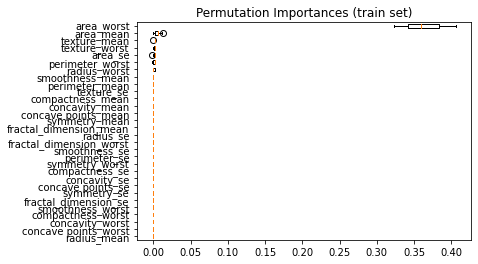

In [162]:
from sklearn.inspection import permutation_importance
best_model = SVC(kernel='rbf',C=1).fit(X_train, y_train)

result = permutation_importance(best_model,X_train,y_train,n_repeats=10)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")

Text(0.5, 1.0, 'Permutation Importances (test set)')

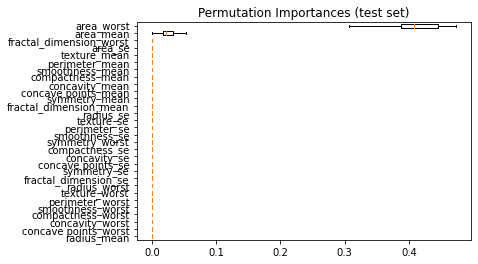

In [163]:
result = permutation_importance(best_model,X_test,y_test,n_repeats=10)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [164]:
# Save your notebook first, then run this cell to create a pdf for your reference.